In [1]:
from sklearn.mixture import GaussianMixture as gm
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
%matplotlib inline

# Generate 2-Gaussian mixture models

In [7]:
N = 2000 # Number of sample to generate 
p = 0.5 # Proportion of model 2

# parameters for model 1
mu_1 = np.array([3,3]);                     #mean for model 1
sigma_1 = np.array([[1,0],[0,1]]);          #covariance matrix for model 1

mu_2 = np.array([-1,-1]);                   #mean for model 2
sigma_2 = np.array([[8,-0.5],[-0.5,0.1]]);  #covariance matrix for model 2

u = np.random.rand(N); # generate u~unif(0,1)

X = np.zeros((N,2))
for i in range(N):
  if u[i] > p: # if u~unif(0,1) generate the first model
    X[i,:] = np.random.multivariate_normal(mu_1,sigma_1);
  else:
    X[i,:] = np.random.multivariate_normal(mu_2,sigma_2);

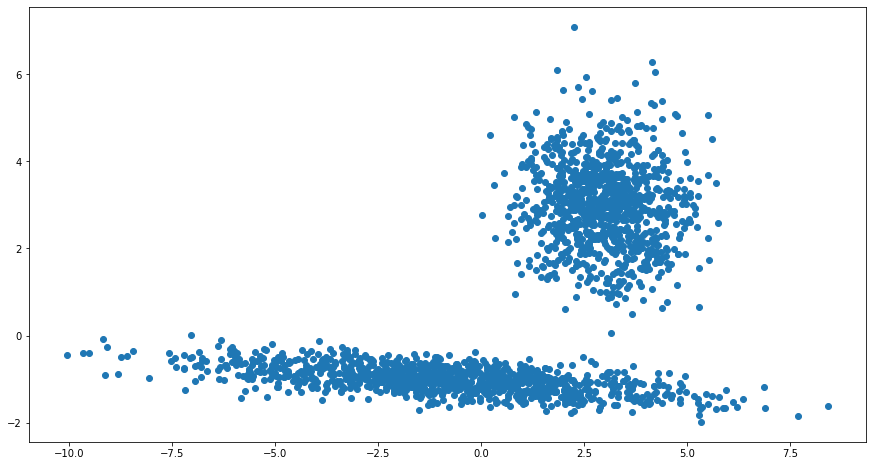

In [8]:
# (Optional) Plot the data
plt.figure(figsize=(15,8)); 
plt.scatter(X[:,0],X[:,1]);

# Expectation-Maximization Algorithm

In [9]:
Nmax = 100; # Maximum iteration

# Initial guess
pro = 0.4 # propotion of model 2

mu0_1 = np.array([1,1]);                #mean for model 1
sigma0_1 = np.array([[1,0],[0,1]]);     #covariance matrix for model 1

mu0_2 = np.array([-1,-1]);              #mean for model 2
sigma0_2 = np.array([[1,0],[0,1]]);     #covariance matrix for model 2


In [10]:
# Algorithm
for i in range(Nmax):
  # E-step calculate responsibility for each data point
  res = pro*mvn.pdf(X,mu0_2,sigma0_2)/(pro*mvn.pdf(X,mu0_2,sigma0_2)+(1-pro)*mvn.pdf(X,mu0_1,sigma0_1));
  # M-step MLE of normal and calculate now proportion
  mu0_1 = np.dot(1-res,X)/sum(1-res);
  mu0_2 = np.dot(res,X)/sum(res);
  sigma0_1 = ((X-mu0_1).T @ np.diag(1-res) @ (X-mu0_1))/sum(1-res)
  sigma0_2 = ((X-mu0_2).T @ np.diag(res) @ (X-mu0_2))/sum(res)
  pro = np.mean(res);


# Compare estimated parameters with the true parameters 

In [11]:
print(pro, p)

0.5208754765129605 0.5


In [12]:
print(mu0_1, mu_1)

[2.97337538 2.99918436] [3 3]


In [13]:
print(sigma0_1,'\n', sigma_1)

[[ 1.0060261  -0.07367234]
 [-0.07367234  0.96492654]] 
 [[1 0]
 [0 1]]


In [14]:
print(mu0_2, mu_2)

[-0.94689832 -0.99937659] [-1 -1]


In [15]:
print(sigma0_2,'\n', sigma_2)

[[ 8.77909713 -0.54503064]
 [-0.54503064  0.09614622]] 
 [[ 8.  -0.5]
 [-0.5  0.1]]
